<a href="https://colab.research.google.com/github/visheshagrawal/IR2022_A3_96/blob/main/IR_A3_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Essential Libraries Required 

In [127]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the File

In [128]:
file_path = "/content/drive/MyDrive/IR/HW3/p2p-Gnutella09.txt"
wiki_db = open(file_path)
node_set=set()
edge_set=[]

Accumulating Nodes and Edges 

In [129]:
count = 0
real=4
for line in wiki_db:
  count+=1
  #We only take lines which are after real variable seeing from the network file (Here it is 4)
  if (count>real):
    edge = []
    sp = line.split()
    node1,node2 = int(sp[0]),int(sp[1])
    node_set.add(node1)
    node_set.add(node2)
    edge.append(node1)
    edge.append(node2)
    edge_set.append(edge)

print("Number of nodes : ",len(node_set))
print("Number of edges : ",len(edge_set))

Number of nodes :  8114
Number of edges :  26013


Representation of Graph to Edge List, Adjacency List, Adjacency Matrix

In [130]:
#Edge List
edge_set

[[0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [0, 10],
 [3, 540],
 [3, 581],
 [3, 1009],
 [3, 1356],
 [3, 1544],
 [3, 2044],
 [3, 2045],
 [3, 2046],
 [3, 2047],
 [3, 2048],
 [7, 671],
 [7, 1063],
 [7, 1159],
 [7, 1562],
 [7, 1572],
 [7, 2004],
 [7, 2034],
 [7, 2035],
 [7, 2036],
 [7, 2037],
 [9, 92],
 [9, 95],
 [9, 96],
 [9, 350],
 [9, 530],
 [9, 703],
 [9, 751],
 [9, 822],
 [9, 823],
 [9, 837],
 [10, 237],
 [10, 430],
 [10, 1164],
 [10, 1574],
 [10, 2038],
 [10, 2039],
 [10, 2040],
 [10, 2041],
 [10, 2042],
 [10, 2043],
 [11, 4],
 [11, 12],
 [11, 13],
 [11, 14],
 [11, 15],
 [11, 16],
 [11, 17],
 [11, 18],
 [11, 19],
 [11, 20],
 [14, 1373],
 [14, 2049],
 [14, 2050],
 [14, 2051],
 [14, 2052],
 [15, 177],
 [15, 2355],
 [15, 2356],
 [19, 347],
 [19, 589],
 [19, 1459],
 [19, 1557],
 [19, 1571],
 [19, 2060],
 [19, 2061],
 [19, 2062],
 [19, 2063],
 [19, 2064],
 [20, 90],
 [20, 356],
 [20, 531],
 [20, 703],
 [20, 1436],
 [20, 1909],
 [20, 1910],
 [20, 1911]

In [131]:
#Making an Adjacency Matrix
max_node=max(list(node_set))+1
adj_mat = [[0 for i in range(max_node)] for k in range(max_node)]
for edge in edge_set:
  u,v=edge[0],edge[1]
  adj_mat[u][v]=1

#Network is a directed graph so row-> column only has 1 (not column->row)

In [132]:
#Making an Adjacency List
adj_list = {}

in_deg={x:0 for x in node_set}
out_deg={x:0 for x in node_set}

for i in node_set:
    adj_list[i] = list()

for edge in edge_set:
    adj_list[edge[0]].append(edge[1]) 

In-Degree and Out-Degree

In [133]:
for node in adj_list:
  neighbours = adj_list[node]
  out_deg[node] = len(neighbours)
  for neigh in neighbours:
    in_deg[neigh]+=1

in_deg[15],out_deg[15]

(8, 3)

Average In-Degree and Out-Degree

In [134]:
total_nodes = len(node_set)

avg_in_deg = sum(in_deg.values())/total_nodes

print("Avg in-degree is",avg_in_deg)

avg_out_deg = sum(out_deg.values())/total_nodes

print("Avg out-degree is",avg_out_deg)

Avg in-degree is 3.2059403500123245
Avg out-degree is 3.2059403500123245


Node with Maximum In-Degree and Node with Maximum Out-Degree


In [135]:
max_in_deg_node = max(in_deg, key= lambda x: in_deg[x])
max_out_deg_node = max(in_deg, key= lambda x: out_deg[x])
max_in_deg = in_deg[max_in_deg_node]
max_out_deg = out_deg[max_out_deg_node]

print("Maximum in-degree:",max_in_deg,"Node with max in-degree:",max_in_deg_node)
print("Maximum out-degree:",max_out_deg,"Node with max out-degree:",max_out_deg_node)

Maximum in-degree: 92 Node with max in-degree: 51
Maximum out-degree: 61 Node with max out-degree: 4317


Density of network = No. of Observed Edges/(Total number of possible edges)
= m/n*(n-1)

In [136]:
m=len(edge_set)
n=len(node_set)
density = m/(n*(n-1))
print("Density of the network is:",density)

Density of the network is: 0.0003951608960942098


Plot:: 


1.   In-Degree
2.   Out-Degree



In [137]:
in_degree_freq = list(in_deg.values())
out_degree_freq = list(out_deg.values())

from collections import Counter

count_in_degree_freq = Counter(in_degree_freq)
count_out_degree_freq = Counter(out_degree_freq)

print(count_in_degree_freq)

Counter({1: 3324, 2: 1595, 3: 968, 4: 738, 5: 443, 6: 316, 7: 198, 8: 120, 0: 76, 9: 75, 10: 65, 11: 34, 12: 30, 13: 15, 14: 14, 15: 10, 17: 8, 89: 6, 59: 5, 77: 5, 16: 5, 92: 3, 57: 3, 30: 3, 71: 3, 20: 3, 18: 3, 21: 2, 35: 2, 78: 2, 19: 2, 23: 2, 79: 2, 48: 2, 46: 2, 44: 2, 69: 2, 29: 2, 66: 1, 56: 1, 83: 1, 70: 1, 68: 1, 54: 1, 24: 1, 73: 1, 65: 1, 85: 1, 60: 1, 72: 1, 38: 1, 27: 1, 43: 1, 50: 1, 61: 1, 42: 1, 26: 1, 81: 1, 91: 1, 22: 1, 28: 1, 25: 1})


Text(0.5, 1.0, 'Out-Degree Distribution Graph for Network')

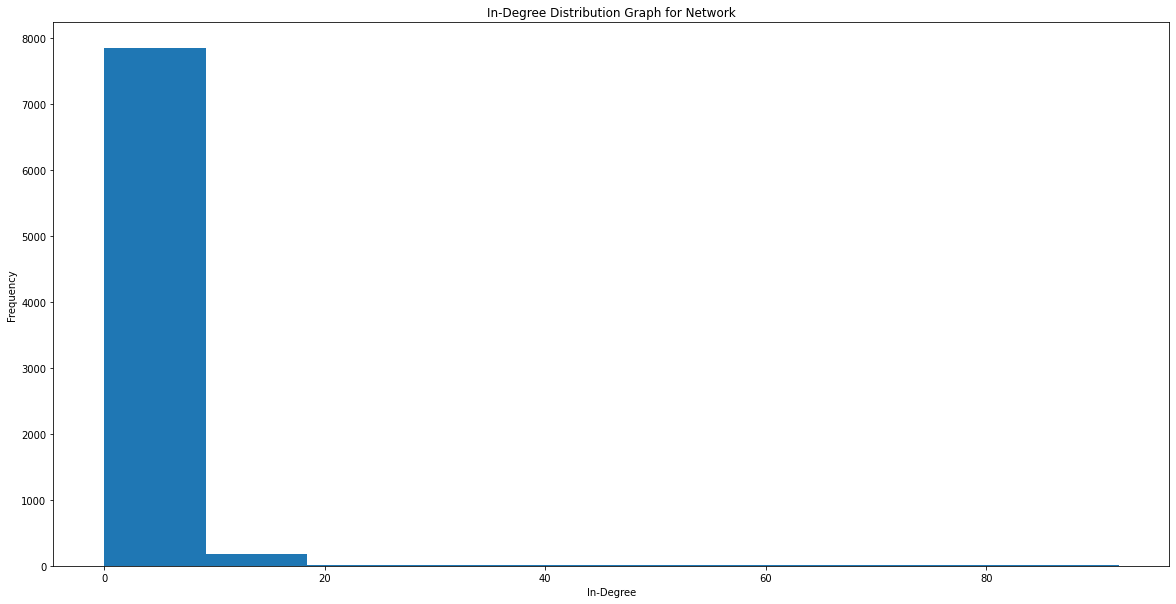

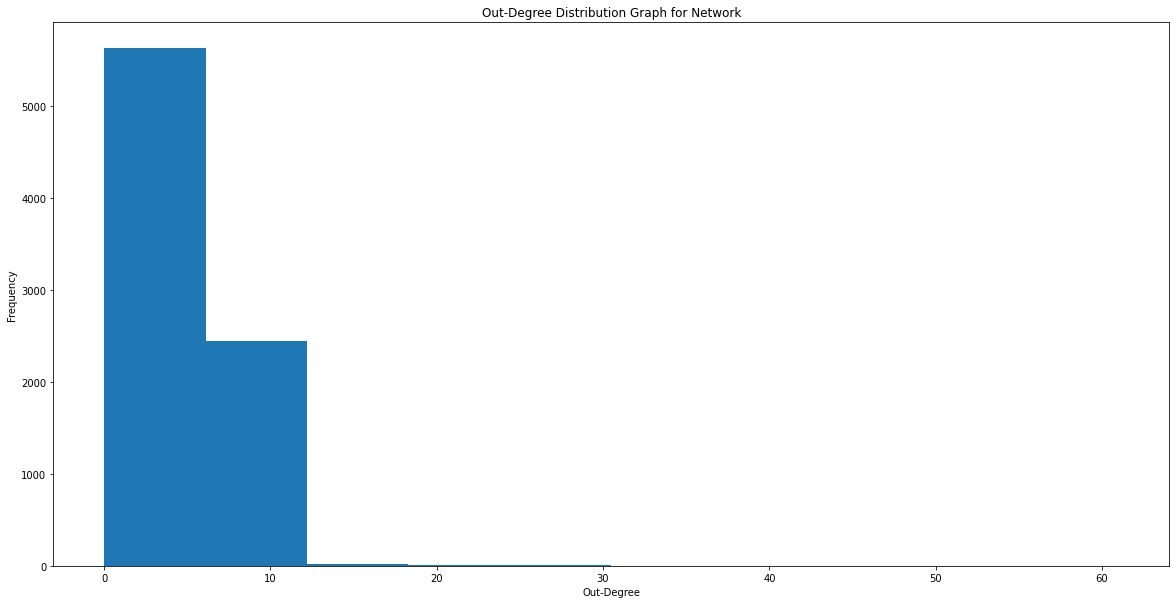

In [138]:
# Plotting In-Degree and Out-Degree Distribution of network

import matplotlib.pyplot as plt

in_degree_freq = list(in_deg.values())
out_degree_freq = list(out_deg.values())

plt.figure(figsize=(20, 10)) 
# plt.loglog(range(len(in_degree_freq)), list(in_deg.values()), 'ro-', label='in-degree') 

plt.hist(in_degree_freq)
plt.xlabel('In-Degree')
plt.ylabel('Frequency')
plt.title('In-Degree Distribution Graph for Network')

plt.figure(figsize=(20, 10)) 
# plt.loglog(range(len(out_degree_freq)), list(out_deg.values()), 'yo-', label='out-degree') 
plt.hist(out_degree_freq)
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.title('Out-Degree Distribution Graph for Network')

Clustering Coefficient

Text(0.5, 1.0, 'Clustering Coefficient Distribution')

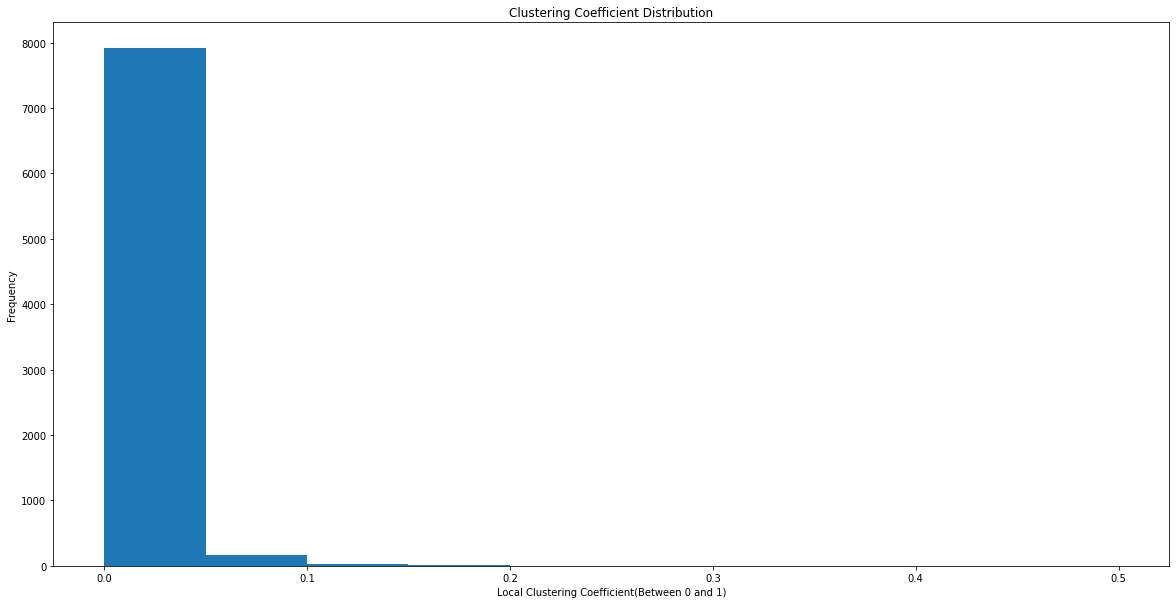

In [139]:
clustering_coeff = []
clustering_coeff_dic={x:0 for x in adj_list}
# For clustering coeff we find out the neighbourhood of node and see which all nodes are connected in neighbourhood
for node in adj_list:
  neigh = adj_list[node]
  degree = len(neigh)
  coeff = 0
  #Checking all points of neighbourhood
  for j in neigh:
    for k in neigh:
      if j!=k and j in adj_list[k]:
        #Adding points which have an edge 
        coeff+=1
  # This is for the case when neighbours are not there or only 1 neighbour
  if degree == 0 or degree == 1:
    clustering_coeff.append(0)
  else:
    #Applying formula, number of connected neighbours divided by total possible outcomes
    clustering_coeff.append((coeff)/(degree*(degree-1)))
    clustering_coeff_dic[node]=(coeff)/(degree*(degree-1))


plt.figure(figsize=(20, 10)) 
# plt.loglog(range(len(clustering_coeff)), clustering_coeff,'go-', label='clustering coefficient') 
plt.hist(clustering_coeff)
plt.xlabel('Local Clustering Coefficient(Between 0 and 1)')
plt.ylabel('Frequency')
plt.title('Clustering Coefficient Distribution')

In [140]:
clustering_coeff_dic

{0: 0.0,
 1: 0,
 2: 0,
 3: 0.0,
 4: 0,
 5: 0,
 6: 0,
 7: 0.0,
 8: 0,
 9: 0.03333333333333333,
 10: 0.0,
 11: 0.0,
 12: 0,
 13: 0,
 14: 0.0,
 15: 0.0,
 16: 0,
 17: 0,
 18: 0,
 19: 0.0,
 20: 0.022222222222222223,
 21: 0.0,
 22: 0,
 23: 0,
 24: 0,
 25: 0.03333333333333333,
 26: 0,
 27: 0,
 28: 0.1111111111111111,
 29: 0,
 30: 0,
 31: 0.0,
 32: 0.0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0.0,
 40: 0.0,
 41: 0,
 42: 0,
 43: 0.0,
 44: 0,
 45: 0,
 46: 0.0,
 47: 0.013888888888888888,
 48: 0,
 49: 0.044444444444444446,
 50: 0,
 51: 0,
 52: 0.06666666666666667,
 53: 0,
 54: 0.0,
 55: 0.0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0.0,
 61: 0,
 62: 0,
 63: 0.0,
 64: 0,
 65: 0,
 66: 0.011111111111111112,
 67: 0.0,
 68: 0,
 69: 0,
 70: 0,
 71: 0.0,
 72: 0.03333333333333333,
 73: 0.044444444444444446,
 74: 0,
 75: 0,
 76: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0,
 80: 0.011111111111111112,
 81: 0,
 82: 0,
 83: 0,
 84: 0.011111111111111112,
 85: 0,
 86: 0,
 87: 0.05555555555555555,
 88: 0.0,
 89: 0.0